# Task-05
Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

Dataset :- https://www.kaggle.com/code/harshalbhamare/us-accident-eda

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
df_USA = pd.read_csv('US_Accidents_March23.csv')

In [6]:
df_USA.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
# Data cleaning and preparation
df_USA.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df_USA.shape

(47618, 46)

In [8]:
df_USA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8455 entries, 0 to 8454
Data columns (total 46 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     8455 non-null   object 
 1   Source                 8455 non-null   object 
 2   Severity               8455 non-null   int64  
 3   Start_Time             8455 non-null   object 
 4   End_Time               8455 non-null   object 
 5   Start_Lat              8455 non-null   float64
 6   Start_Lng              8455 non-null   float64
 7   End_Lat                0 non-null      float64
 8   End_Lng                0 non-null      float64
 9   Distance(mi)           8455 non-null   float64
 10  Description            8455 non-null   object 
 11  Street                 8455 non-null   object 
 12  City                   8455 non-null   object 
 13  County                 8455 non-null   object 
 14  State                  8455 non-null   object 
 15  Zipc

In [9]:
df_USA.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,8455.000000,8455.000000,8455.000000,0.0,0.0,8455.000000,8376.000000,919.000000,8347.000000,8426.000000,8366.000000,7037.000000,807.000000
mean,2.395860,38.152237,-118.531858,NaN,NaN,0.021635,62.120177,31.159195,61.659518,30.002432,8.963722,8.906850,0.026766
std,0.491717,0.772768,10.755979,NaN,NaN,0.427770,17.580496,11.582098,24.877043,0.337494,2.440342,4.467718,0.049097
min,1.000000,36.352592,-123.793976,NaN,NaN,0.000000,3.900000,-8.400000,8.000000,3.010000,0.200000,1.200000,0.000000
25%,2.000000,37.648651,-122.141788,NaN,NaN,0.000000,50.000000,24.900000,43.000000,29.890000,10.000000,5.800000,0.000000
50%,2.000000,37.964699,-121.870636,NaN,NaN,0.000000,59.000000,33.900000,63.000000,30.010000,10.000000,8.100000,0.010000
75%,3.000000,38.582378,-121.339386,NaN,NaN,0.010000,73.900000,40.600000,83.000000,30.110000,10.000000,11.500000,0.030000
max,4.000000,41.428753,-81.550728,NaN,NaN,24.040000,106.000000,66.000000,100.000000,30.620000,40.000000,31.100000,0.490000


In [10]:
#How many  numeric columns are there in the dataset?
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_dataset = df_USA.select_dtypes(include=numerics)
print(numeric_dataset.shape)
numeric_dataset

(8455, 13)


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,3,39.865147,-84.058723,NaN,NaN,0.01,36.9,NaN,91.0,29.68,10.0,NaN,0.02
1,2,39.928059,-82.831184,NaN,NaN,0.01,37.9,NaN,100.0,29.65,10.0,NaN,0.00
2,2,39.063148,-84.032608,NaN,NaN,0.01,36.0,33.3,100.0,29.67,10.0,3.5,NaN
3,3,39.747753,-84.205582,NaN,NaN,0.01,35.1,31.0,96.0,29.64,9.0,4.6,NaN
4,2,39.627781,-84.188354,NaN,NaN,0.01,36.0,33.3,89.0,29.65,6.0,3.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8450,2,38.277042,-121.304710,NaN,NaN,0.01,45.0,41.2,93.0,29.77,10.0,6.9,NaN
8451,2,38.269787,-121.302544,NaN,NaN,0.01,45.0,41.2,93.0,29.77,10.0,6.9,NaN
8452,2,38.695202,-120.998116,NaN,NaN,0.00,39.2,32.0,100.0,29.73,0.2,11.5,NaN
8453,2,37.316765,-121.946053,NaN,NaN,0.01,48.0,NaN,80.0,29.83,10.0,6.9,NaN


In [11]:
#How many NULL values are there in each column?

df_USA.isnull().sum().sort_values(ascending=False)

End_Lat                  8455
End_Lng                  8455
Precipitation(in)        7648
Wind_Chill(F)            7536
Wind_Speed(mph)          1418
Humidity(%)               108
Visibility(mi)             89
Temperature(F)             79
Weather_Condition          71
Pressure(in)               29
Wind_Direction             26
Weather_Timestamp          26
Timezone                    1
Airport_Code                1
Zipcode                     1
Bump                        0
Junction                    0
No_Exit                     0
Railway                     0
Roundabout                  0
Station                     0
Stop                        0
Traffic_Calming             0
Give_Way                    0
Traffic_Signal              0
Turning_Loop                0
Sunrise_Sunset              0
Civil_Twilight              0
Nautical_Twilight           0
Crossing                    0
ID                          0
Amenity                     0
Source                      0
Country   

In [12]:
#What is the percentage of NULL values in each column?
missing_val = df_USA.isnull().sum().sort_values(ascending=False)/len(df_USA) * 100
missing_val[missing_val>0]

End_Lat              100.000000
End_Lng              100.000000
Precipitation(in)     90.455352
Wind_Chill(F)         89.130692
Wind_Speed(mph)       16.771141
Humidity(%)            1.277351
Visibility(mi)         1.052632
Temperature(F)         0.934358
Weather_Condition      0.839740
Pressure(in)           0.342992
Wind_Direction         0.307510
Weather_Timestamp      0.307510
Timezone               0.011827
Airport_Code           0.011827
Zipcode                0.011827
dtype: float64

<Axes: >

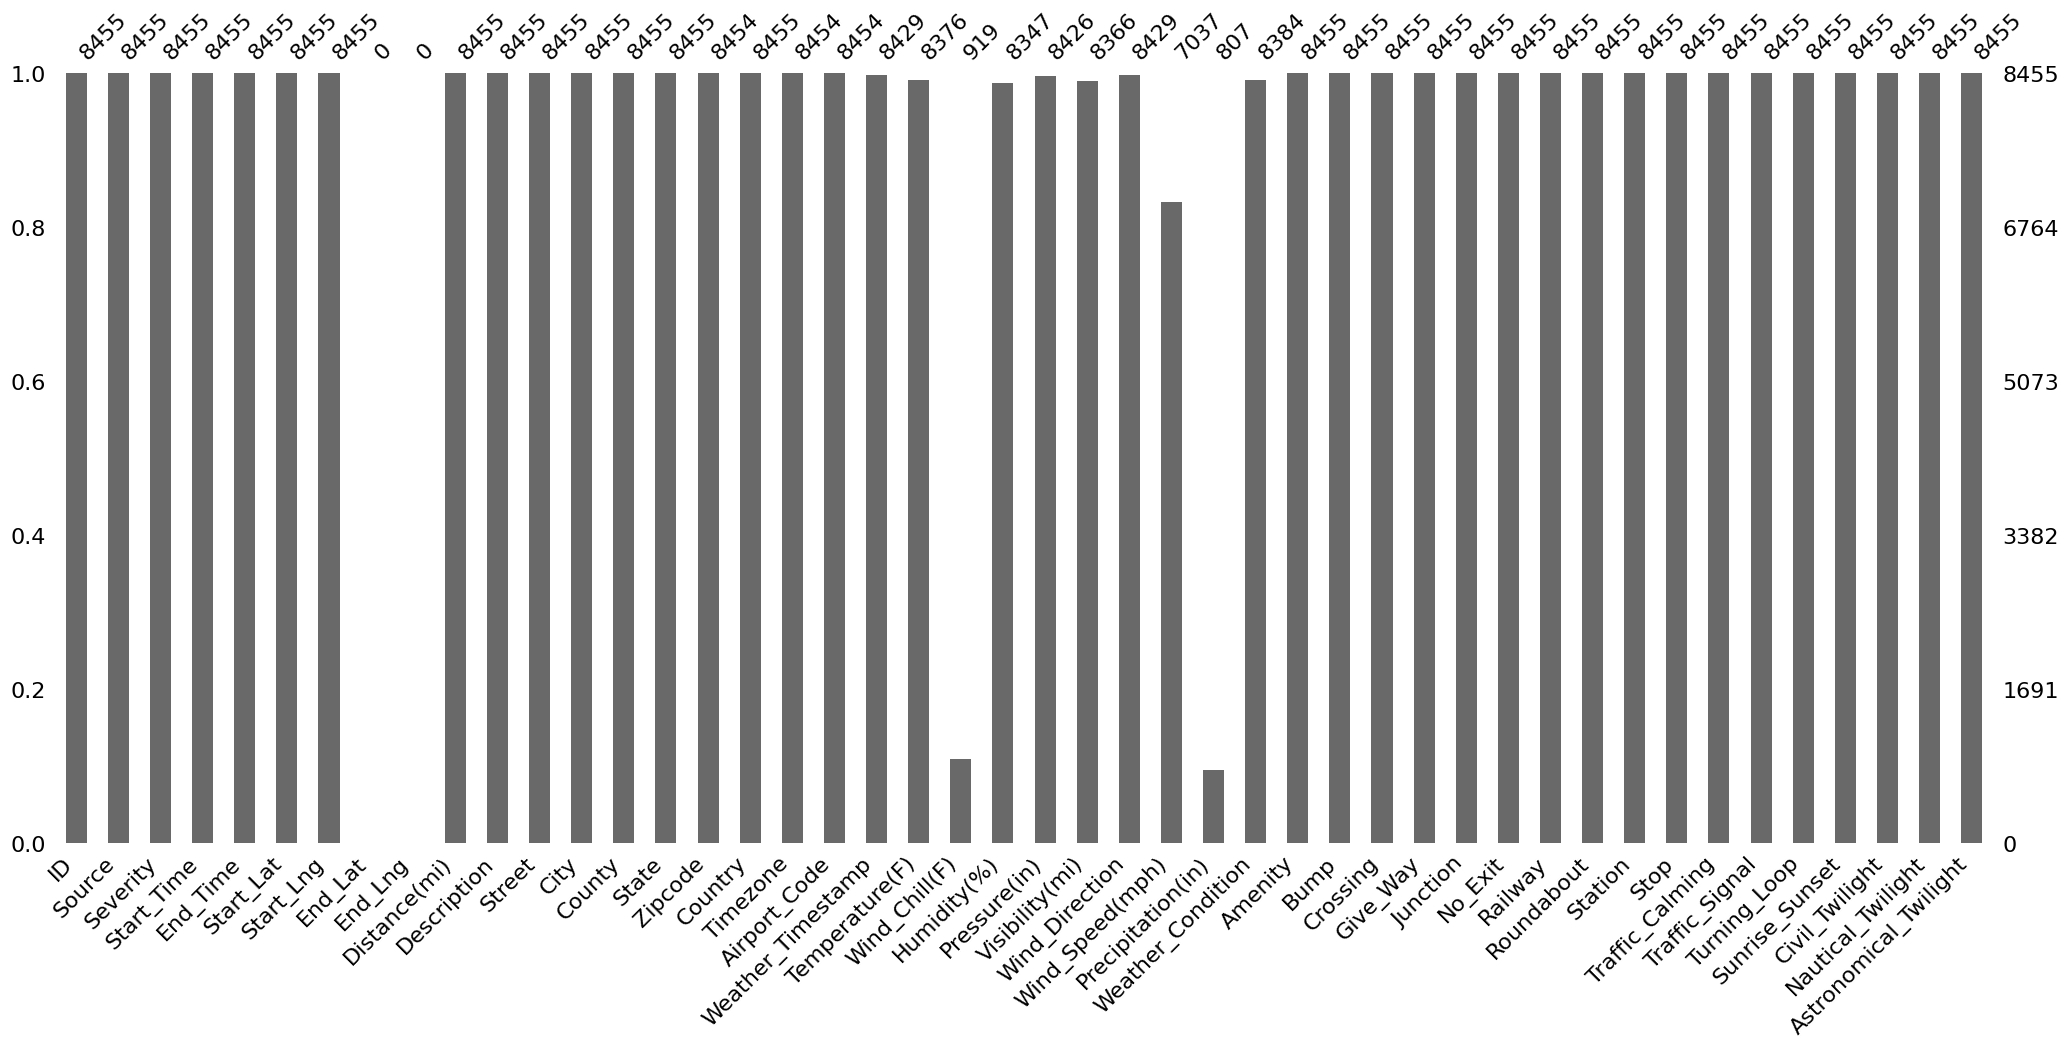

In [13]:
#Visulaize the number of missing values in our dataset
import missingno as msn
msn.bar(df_USA)

In [14]:
df_USA['Weather_Condition'].isnull().sum()

71

# Step Two: Exploratory analysis and visualization
We'll be analysisng and exploring the following columns in our dataset:

City: Shows the city in address record.
Start Time: Shows start time of the accident in local time zone.
Start Lat, Start Long: Shows latitude in GPS coordinate of the start point // Shows longitude in GPS coordinate of the start point of accident.
Temperature: Shows the temperature (in Fahrenheit).
Weather condition: Shows the weather condition (rain, snow, thunderstorm, fog, etc.)
# Analysing City column

In [16]:
cities = df_USA['City']
cities

0             Dayton
1       Reynoldsburg
2       Williamsburg
3             Dayton
4             Dayton
            ...     
8450            Galt
8451            Galt
8452    Cameron Park
8453        San Jose
8454      Emeryville
Name: City, Length: 8455, dtype: object

In [17]:
unique_cities = cities.unique()
print("The number of unique cities where accidents have taken place in USA: ",len(unique_cities))
unique_cities


The number of unique cities where accidents have taken place in USA:  386


array(['Dayton', 'Reynoldsburg', 'Williamsburg', 'Westerville',
       'Columbus', 'Miamisburg', 'Johnstown', 'Dublin',
       'Canal Winchester', 'Lebanon', 'Sabina', 'Goshen', 'Waynesville',
       'Springboro', 'Carroll', 'Oregonia', 'Independence',
       'Maple Heights', 'Grove City', 'Findlay', 'Fairborn', 'Piqua',
       'New Richmond', 'Batavia', 'Galena', 'Barberton', 'Akron',
       'Mansfield', 'Cleveland', 'Bethel', 'Pataskala', 'Seville',
       'Bellville', 'Troy', 'Wilmington', 'North Olmsted', 'Groveport',
       'Orient', 'Tiro', 'Strongsville', 'Beavercreek', 'Circleville',
       'Peebles', 'Hurricane', 'Xenia', 'Elyria', 'Pickerington',
       'Burbank', 'Zanesville', 'North Baltimore', 'Mount Sterling',
       'Tipp City', 'Moraine', 'Hilliard', 'Bowling Green', 'Maineville',
       'Vermilion', 'Milford', 'Brookpark', 'Fraziers Bottom',
       'Cambridge', 'Delaware', 'Moscow', 'Oberlin', 'Sardinia',
       'Lewis Center', 'Urbancrest', 'Brecksville', 'Frankfort',

In [18]:
unique_city_count = cities.value_counts()
unique_city_count

Sacramento       987
San Jose         479
Dayton           321
Oakland          321
San Francisco    223
                ... 
Strongsville       1
Circleville        1
Peebles            1
Hurricane          1
Williams           1
Name: City, Length: 386, dtype: int64

In [19]:
print("The Top 10 Cities of USA with highest number of accidents are:")
unique_city_count[:11]

The Top 10 Cities of USA with highest number of accidents are:


Sacramento       987
San Jose         479
Dayton           321
Oakland          321
San Francisco    223
Tracy            183
Stockton         183
Columbus         170
Hayward          167
Fremont          137
Santa Rosa       133
Name: City, dtype: int64

In [20]:
'New York' in unique_city_count

False

<Axes: >

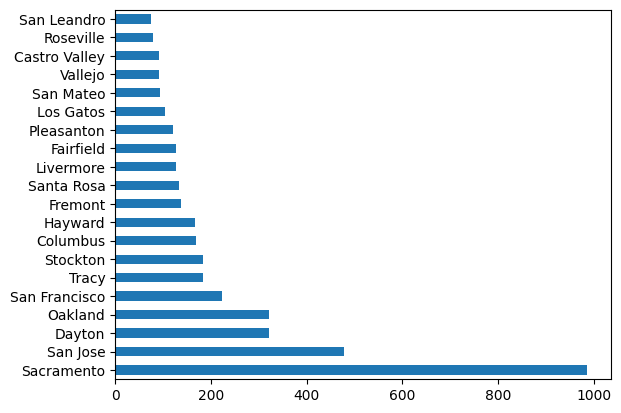

In [21]:
unique_city_count[:20].plot(kind='barh')

In [23]:
df_USA['Start_Lat']

0       39.865147
1       39.928059
2       39.063148
3       39.747753
4       39.627781
          ...    
8450    38.277042
8451    38.269787
8452    38.695202
8453    37.316765
8454    37.844070
Name: Start_Lat, Length: 8455, dtype: float64

In [24]:
df_USA['Start_Lng']

0       -84.058723
1       -82.831184
2       -84.032608
3       -84.205582
4       -84.188354
           ...    
8450   -121.304710
8451   -121.302544
8452   -120.998116
8453   -121.946053
8454   -122.297653
Name: Start_Lng, Length: 8455, dtype: float64

<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

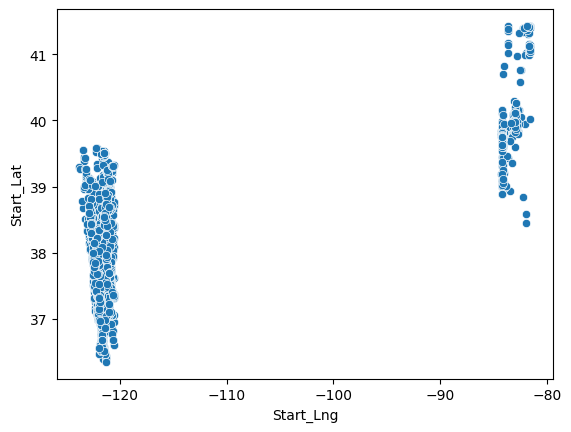

In [26]:
sns.scatterplot(x=df_USA['Start_Lng'], y=df_USA['Start_Lat'])

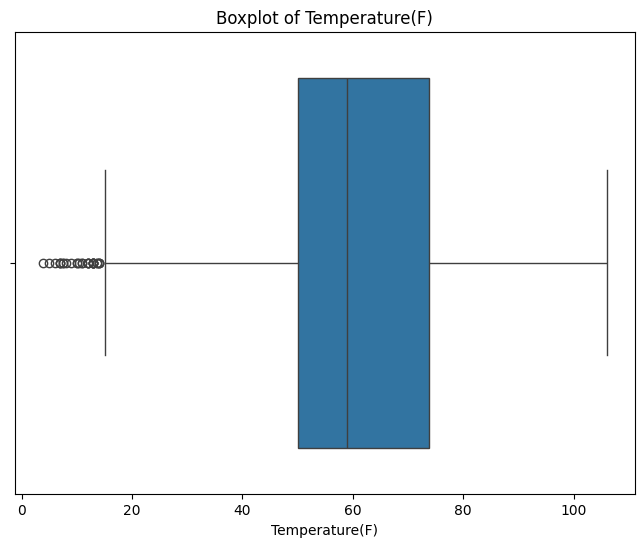

In [27]:
# Identify outliers in numerical columns
# Example: Check for outliers in 'Temperature(F)'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_USA['Temperature(F)'])
plt.title('Boxplot of Temperature(F)')
plt.xlabel('Temperature(F)')
plt.show()

# Handle outliers as per analysis requirements (e.g., remove or cap outliers)
# Example: Cap outliers in 'Temperature(F)' column
temperature_median = df_USA['Temperature(F)'].median()
temperature_std = df_USA['Temperature(F)'].std()
upper_bound = temperature_median + 3 * temperature_std
df_USA['Temperature(F)'] = df_USA['Temperature(F)'].apply(lambda x: upper_bound if x > upper_bound else x)

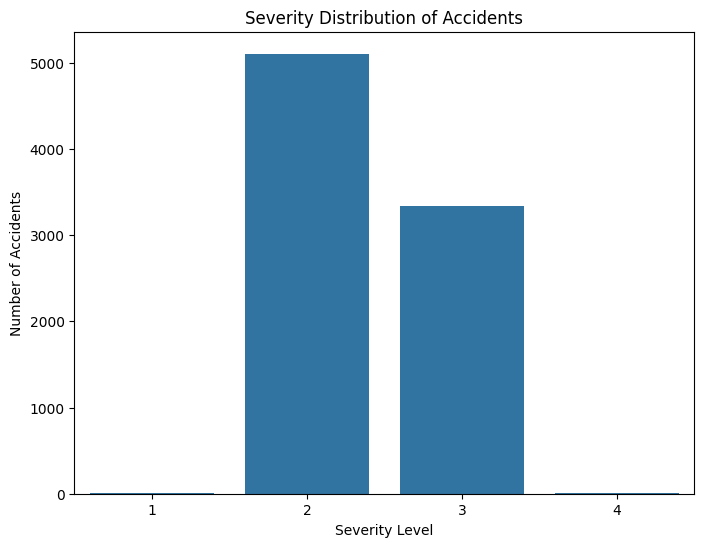

In [28]:
# Analyze Severity distribution
severity_distribution = df_USA['Severity'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=severity_distribution.index, y=severity_distribution.values)
plt.title('Severity Distribution of Accidents')
plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')
plt.show()

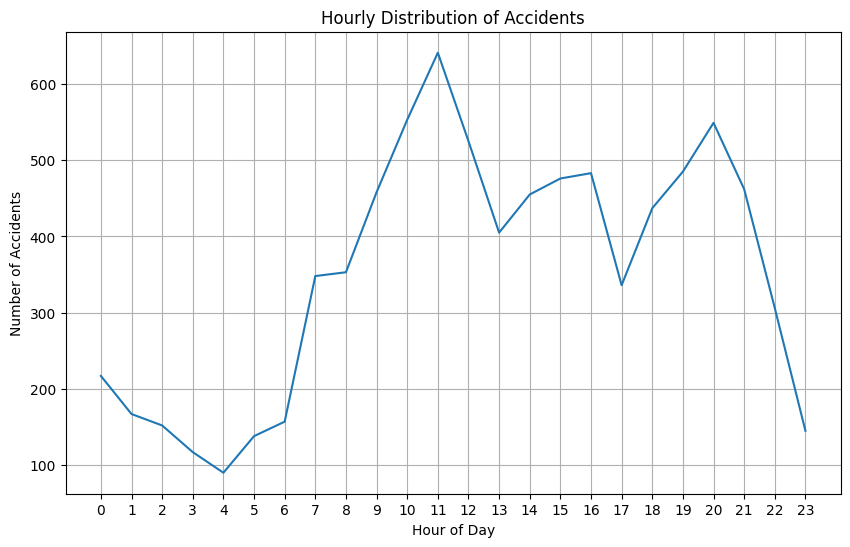

In [29]:
# Explore Time of Day patterns
df_USA['Start_Time'] = pd.to_datetime(df_USA['Start_Time'])
df_USA['Hour'] = df_USA['Start_Time'].dt.hour
hourly_accidents = df_USA.groupby('Hour').size()
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_accidents.index, y=hourly_accidents.values)
plt.title('Hourly Distribution of Accidents')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(24))
plt.grid(True)
plt.show()

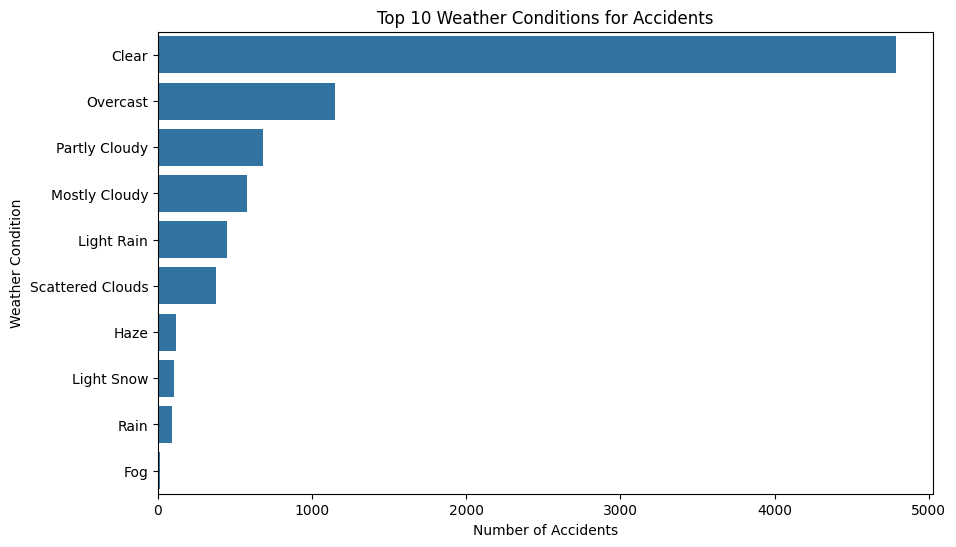

In [30]:
# Investigate Weather conditions
weather_conditions = df_USA['Weather_Condition'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_conditions.values, y=weather_conditions.index, orient='h')
plt.title('Top 10 Weather Conditions for Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.show()

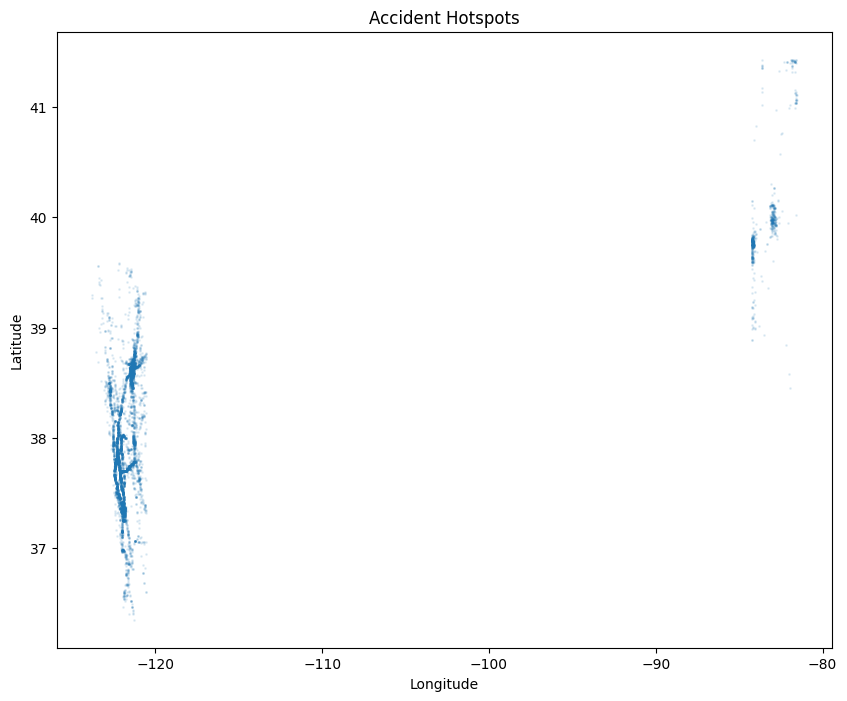

In [31]:
# Identify Accident hotspots (geospatial visualization)
# Assuming you have latitude and longitude columns: 'Start_Lat' and 'Start_Lng'
plt.figure(figsize=(10, 8))
plt.scatter(df_USA['Start_Lng'], df_USA['Start_Lat'], alpha=0.1, s=1)
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check data types of columns
print(df_USA.dtypes)

ID                               object
Source                           object
Severity                          int64
Start_Time               datetime64[ns]
End_Time                         object
Start_Lat                       float64
Start_Lng                       float64
End_Lat                         float64
End_Lng                         float64
Distance(mi)                    float64
Description                      object
Street                           object
City                             object
County                           object
State                            object
Zipcode                          object
Country                          object
Timezone                         object
Airport_Code                     object
Weather_Timestamp                object
Temperature(F)                  float64
Wind_Chill(F)                   float64
Humidity(%)                     float64
Pressure(in)                    float64
Visibility(mi)                  float64


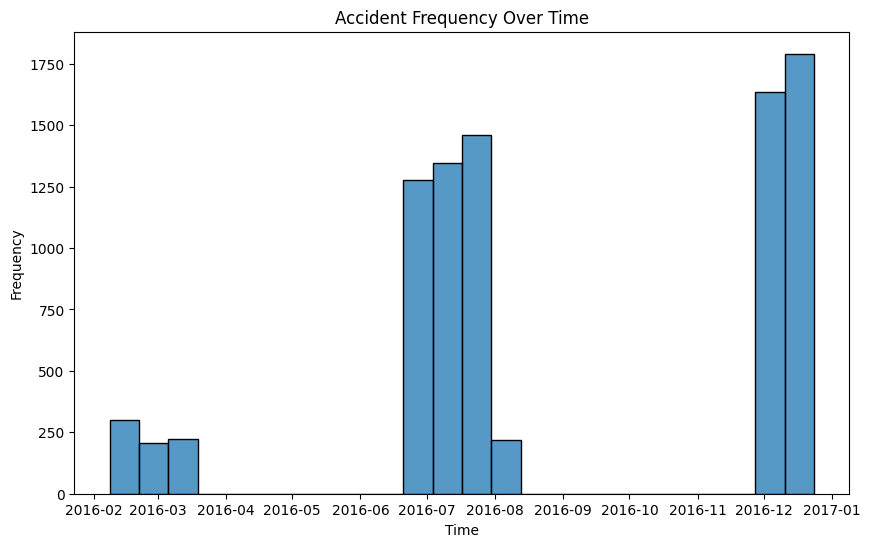

In [39]:
# Plot accident frequency over time
plt.figure(figsize=(10, 6))
sns.histplot(df_USA['Start_Time'], bins=24)
plt.title('Accident Frequency Over Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

<ipython-input-40-bd0666103160>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df_USA['Start_Lng'], y=df_USA['Start_Lat'], cmap='Reds', shade=True)


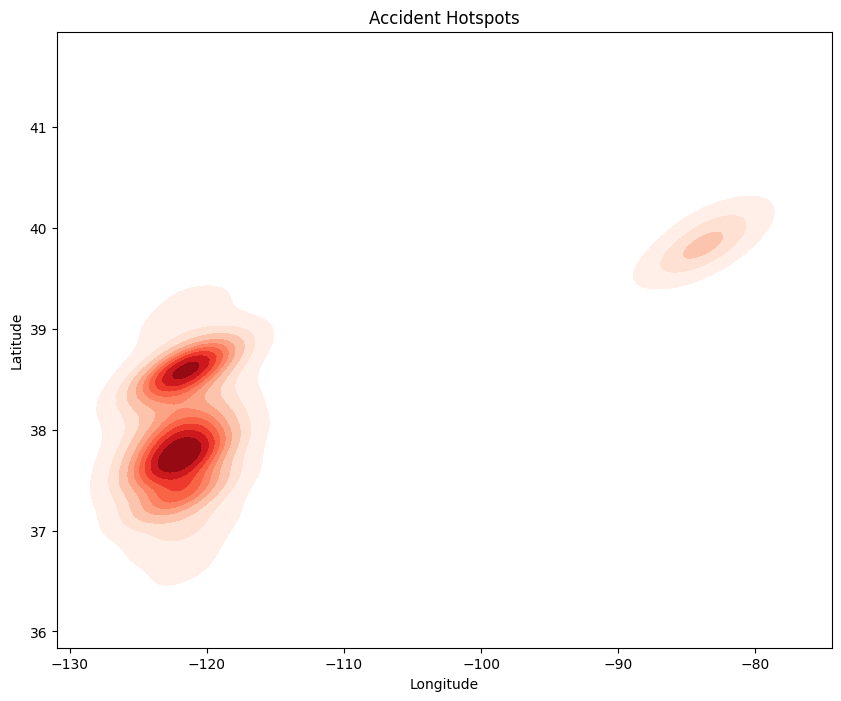

In [40]:
import seaborn as sns

# Generate heatmap for accident hotspots
plt.figure(figsize=(10, 8))
sns.kdeplot(x=df_USA['Start_Lng'], y=df_USA['Start_Lat'], cmap='Reds', shade=True)
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

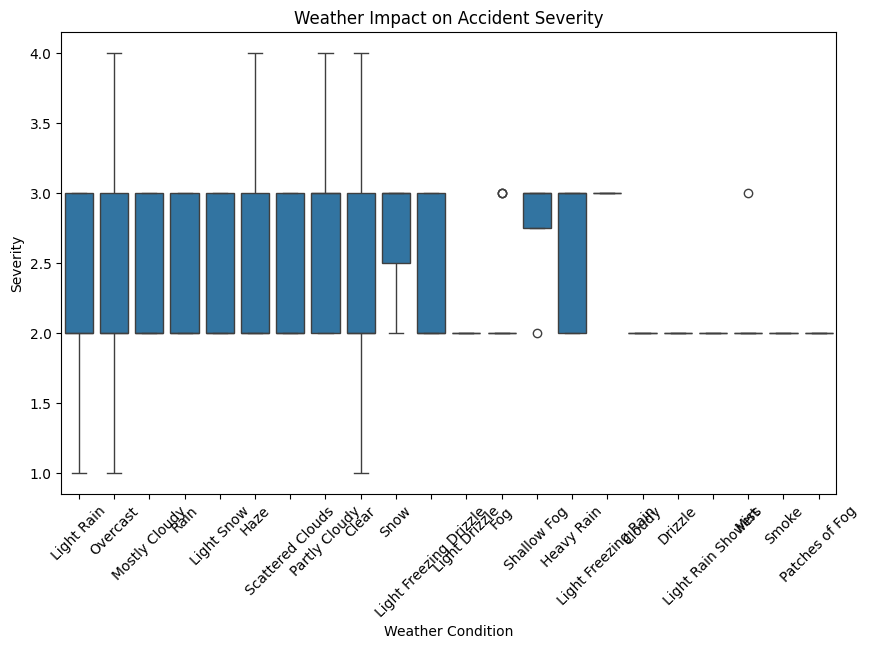

In [41]:
# Visualize weather impact
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather_Condition', y='Severity', data=df_USA)
plt.title('Weather Impact on Accident Severity')
plt.xlabel('Weather Condition')
plt.ylabel('Severity')
plt.xticks(rotation=45)
plt.show()

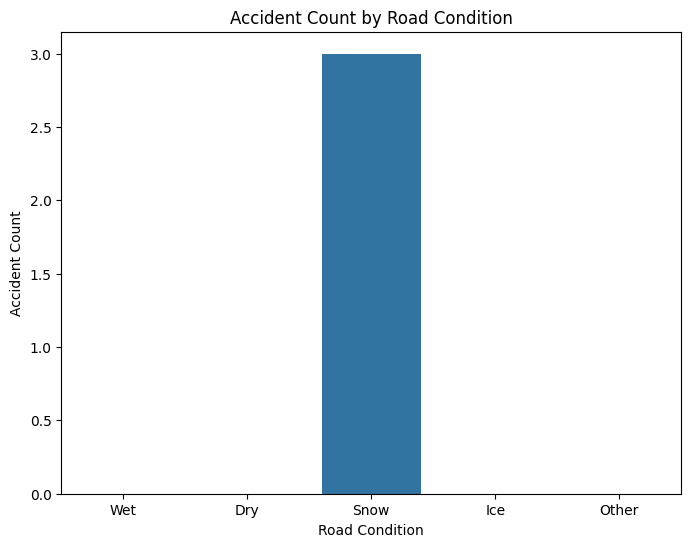

In [42]:
# Create charts for road conditions
road_conditions = ['Wet', 'Dry', 'Snow', 'Ice', 'Other']
accident_counts = [df_USA[df_USA['Weather_Condition'] == condition].shape[0] for condition in road_conditions]

plt.figure(figsize=(8, 6))
sns.barplot(x=road_conditions, y=accident_counts)
plt.title('Accident Count by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Accident Count')
plt.show()